<a href="https://colab.research.google.com/github/nuvita97/House-Price-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/nuvita97/House-Price-Prediction

import os
path = 'House-Price-Prediction'
os.chdir(path)
os.listdir()

Cloning into 'House-Price-Prediction'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 22 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (22/22), done.


['README.md',
 'Ridge and Lasso Regression.png',
 'train.csv',
 '.git',
 'House_Price_Prediction.ipynb',
 'test.csv']

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Image
import warnings
warnings.filterwarnings('ignore')

pd.set_option('max.columns', 100)
pd.set_option('max.rows', 500)

In [4]:
data = pd.read_csv("train.csv")
display(data.head())
print(data.shape)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


(1460, 81)


# Data Understanding
- SalePrice: The property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

In [5]:
# Create a function for counting missing values

def find_missing_percent(data):
  miss_df = pd.DataFrame(columns = ["ColumnName", "TotalMissingVals", "PercentMissing"])
  for col in data.columns:
    NumOfMissing = data[col].isnull().sum()
    if(NumOfMissing == 0):
        continue
    PercentOfMissing = (NumOfMissing / data.shape[0]) * 100
    data_dict = {"ColumnName": col, "TotalMissingVals": NumOfMissing, 
                  "PercentMissing": PercentOfMissing}
    miss_df = miss_df.append(data_dict, ignore_index = True)
  return miss_df

miss_df = find_missing_percent(data)
display(miss_df)    

,ColumnName,TotalMissingVals,PercentMissing
0,LotFrontage,259,17.739726
1,Alley,1369,93.767123
2,MasVnrType,8,0.547945
3,MasVnrArea,8,0.547945
4,BsmtQual,37,2.534247
5,BsmtCond,37,2.534247
6,BsmtExposure,38,2.602740
7,BsmtFinType1,37,2.534247
8,BsmtFinType2,38,2.602740
9,Electrical,1,0.068493


In [6]:
# Create dataframe without columns having high missing percent

high_miss_cols = list(miss_df[miss_df["PercentMissing"] >= 50.0]["ColumnName"])
high_miss_cols

data = data.drop(high_miss_cols, axis = 1)
display(data.head())
print(data.shape)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


(1460, 77)


# Use 4 approaches to handle missing
- Approach 1 : Deletion 
- Approach 2 : Imputation (by value: Mean, Mode, Median)
- Approach 3 : Model-Based Imputation (Regression)
- Approach 4 : MICE (Multiple Imputation by Chained Equations)

### Approach 1: Deletion

In [7]:
data_deletion = data.copy()

def missing_deletion(data_deletion):
  for col in data_deletion.columns:
    miss_ind = data_deletion[data_deletion[col].isnull()].index
    data_deletion = data_deletion.drop(miss_ind, axis = 0)
  data_deletion = data_deletion.reset_index(drop = True)
  return data_deletion

data_deletion = missing_deletion(data_deletion)
display(data_deletion.head())
print(data_deletion.shape)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
1,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
2,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
3,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
4,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,307000


(583, 77)


In [8]:
miss_df = find_missing_percent(data_deletion)
display(miss_df)

,ColumnName,TotalMissingVals,PercentMissing


### Approach 2: Imputation (by value: Mean, Mode, Median)

In [9]:
data_impute_value = data.copy()

numeric_cols = data_impute_value.select_dtypes(["int64", "float64"]).columns
categoric_cols = data_impute_value.select_dtypes(["object"]).columns

print(numeric_cols)
print(categoric_cols)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC

In [10]:
# Find missing columns by numeric & categoric

miss_df = find_missing_percent(data)
missing_cols = list(miss_df["ColumnName"])
missing_numeric_cols = list(set(missing_cols) - set(categoric_cols))
missing_categoric_cols = list(set(missing_cols) - set(numeric_cols))

print(missing_numeric_cols)
print(missing_categoric_cols)

['MasVnrArea', 'GarageYrBlt', 'LotFrontage']
['BsmtQual', 'BsmtFinType2', 'Electrical', 'GarageCond', 'BsmtFinType1', 'GarageFinish', 'MasVnrType', 'BsmtExposure', 'GarageType', 'GarageQual', 'FireplaceQu', 'BsmtCond']


In [11]:
# Use median for missing_numeric, mode for missing_categoric

def median_imputation(data_impute_value, missing_numeric_cols):
  for col in missing_numeric_cols:
    medianV = data_impute_value[col].median()
    data_impute_value[col] = data_impute_value[col].fillna(medianV)
  return data_impute_value

def mode_imputation(data_impute_value, missing_categoric_cols):
  for col in missing_categoric_cols:
    modeV = data_impute_value[col].mode().iloc[0]
    data_impute_value[col] = data_impute_value[col].fillna(modeV)
  return data_impute_value

In [12]:
data_impute_value = median_imputation(data_impute_value, missing_numeric_cols)
data_impute_value = mode_imputation(data_impute_value, missing_categoric_cols)

display(data_impute_value.head())
print(data_impute_value.shape)

miss_df = find_missing_percent(data_impute_value)
display(miss_df)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


(1460, 77)


,ColumnName,TotalMissingVals,PercentMissing


### Approach 3: Model-Based Imputation (Boosting)


In [13]:
!pip install xgboost
import xgboost

In [14]:
# Predictor: input nonmissing features
# Target: missing feature
target_cols = missing_numeric_cols
predictor_cols = list(set(numeric_cols) - set(target_cols) - set(["Id"]))

print(target_cols)
print(predictor_cols)

['MasVnrArea', 'GarageYrBlt', 'LotFrontage']
['SalePrice', 'OverallCond', 'HalfBath', '2ndFlrSF', 'BsmtHalfBath', 'MSSubClass', 'MoSold', 'OverallQual', 'MiscVal', 'GarageCars', 'BedroomAbvGr', '1stFlrSF', 'YearRemodAdd', 'LowQualFinSF', 'WoodDeckSF', 'Fireplaces', 'TotalBsmtSF', 'BsmtFinSF2', 'BsmtUnfSF', 'PoolArea', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'TotRmsAbvGrd', 'GrLivArea', 'BsmtFullBath', 'YrSold', 'KitchenAbvGr', 'YearBuilt', '3SsnPorch', 'BsmtFinSF1', 'FullBath', 'LotArea', 'GarageArea']


In [15]:
# Find Correlation
correlation_data = data[predictor_cols + ['MasVnrArea']].corr()['MasVnrArea'].sort_values(ascending = False)
print(correlation_data[correlation_data > 0.2])
print(correlation_data[correlation_data > 0.2].keys()[1:])

MasVnrArea      1.000000
SalePrice       0.477493
OverallQual     0.411876
GrLivArea       0.390857
GarageArea      0.373066
GarageCars      0.364204
TotalBsmtSF     0.363936
1stFlrSF        0.344501
YearBuilt       0.315707
TotRmsAbvGrd    0.280682
FullBath        0.276833
BsmtFinSF1      0.264736
Fireplaces      0.249070
HalfBath        0.201444
Name: MasVnrArea, dtype: float64
Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
       'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'TotRmsAbvGrd', 'FullBath',
       'BsmtFinSF1', 'Fireplaces', 'HalfBath'],
      dtype='object')


In [16]:
def Numeric_Model_Imputation(data, predictor_cols, target_cols):
  data_model_imputation = data.copy()
  data_numeric_predictors = data[predictor_cols].copy()

  for col in target_cols:
    df1 = data_model_imputation
    df2 = data_numeric_predictors
    # Find rows having missing data 
    missing_rows_index = df1[col][df1[col].isnull()].index
    # X (no missing cols) to predict y (missing cols)
    X = df2.copy()
    y = df1[[col]]
    # Remove missing rows -> not allowed training
    X_drop = X.drop(missing_rows_index, axis = 0)
    y_drop = y.drop(missing_rows_index, axis = 0)
    # Covert to array
    X_drop = X_drop.values
    y_drop = y_drop.values

    # XGBoost: learn x_drop -> predict y_drop
    xgb = xgboost.XGBRegressor(objective = "reg:squarederror", random_state = 42)
    xgb.fit(X_drop, y_drop)
    
    y_predict = xgb.predict(X.values)
    data_model_imputation[col][missing_rows_index] = y_predict[missing_rows_index]

  return data_model_imputation

In [17]:
data_model_imputation = Numeric_Model_Imputation(data, predictor_cols, target_cols)
display(data_model_imputation.head())

miss_df = find_missing_percent(data_model_imputation)
display(miss_df)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


,ColumnName,TotalMissingVals,PercentMissing
0,MasVnrType,8,0.547945
1,BsmtQual,37,2.534247
2,BsmtCond,37,2.534247
3,BsmtExposure,38,2.602740
4,BsmtFinType1,37,2.534247
5,BsmtFinType2,38,2.602740
6,Electrical,1,0.068493
7,FireplaceQu,690,47.260274
8,GarageType,81,5.547945
9,GarageFinish,81,5.547945


In [18]:
# Use Mode to predict categorical missing

data_model_imputation = mode_imputation(data_model_imputation, missing_categoric_cols)
display(data_model_imputation.head())
miss_df = find_missing_percent(data_model_imputation)
display(miss_df)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


,ColumnName,TotalMissingVals,PercentMissing


### Approach 4: MICE

In [19]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.ensemble import (GradientBoostingRegressor, GradientBoostingClassifier)

# MICE with numeric cols
data_mice_numeric = data[numeric_cols].copy()
iter_imp_numeric = IterativeImputer(GradientBoostingRegressor())
data_numeric_impute_mice = iter_imp_numeric.fit_transform(data_mice_numeric)

In [20]:
# Convert from array to dataframe
data_numeric_impute_mice = pd.DataFrame(data_numeric_impute_mice, columns = numeric_cols, index = data_mice_numeric.index)
display(data_numeric_impute_mice.head())

miss_df = find_missing_percent(data_numeric_impute_mice)
display(miss_df)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,1.0,1998.0,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,2000.0,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0


,ColumnName,TotalMissingVals,PercentMissing


In [21]:
from sklearn.preprocessing import OrdinalEncoder
data_categoric = data[categoric_cols].copy()
display(data_categoric.head())

# Encoding all of categorical cols
encoder = {}
for col in categoric_cols:
    encoder[col] = OrdinalEncoder() # Encoder Controller
    val_cols = data_categoric[col][data_categoric[col].notnull()].values.reshape(-1, 1)
    val_cols_enc = encoder[col].fit_transform(val_cols)
    data_categoric[col][data_categoric[col].notnull()] = val_cols_enc.ravel()
    
data_categoric.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,3.0,3.0,2.0,5.0,1.0,0.0,1.0,4.0,2.0,6.0,NaN,1.0,1.0,4.0,4.0,2.0,8.0,4.0
1,3.0,1.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,0.0,2.0,1.0,1.0,8.0,8.0,2.0,3.0,4.0,1.0,2.0,3.0,1.0,0.0,5.0,1.0,0.0,1.0,4.0,3.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
2,3.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,3.0,2.0,2.0,5.0,1.0,0.0,1.0,4.0,2.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
3,3.0,1.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,0.0,5.0,1.0,1.0,13.0,15.0,2.0,3.0,4.0,0.0,3.0,1.0,3.0,0.0,5.0,1.0,2.0,1.0,4.0,2.0,6.0,2.0,5.0,2.0,4.0,4.0,2.0,8.0,0.0
4,3.0,1.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,3.0,0.0,2.0,5.0,1.0,0.0,1.0,4.0,2.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0


In [22]:
# MICE with catogorical cols
iter_imp_categoric = IterativeImputer(GradientBoostingClassifier(), max_iter = 5, initial_strategy = 'most_frequent')
data_categoric_imputation_mice = iter_imp_categoric.fit_transform(data_categoric)

In [23]:
data_categoric_imputation_mice

array([[3., 1., 3., ..., 2., 8., 4.],
       [3., 1., 3., ..., 2., 8., 4.],
       [3., 1., 0., ..., 2., 8., 4.],
       ...,
       [3., 1., 3., ..., 2., 8., 4.],
       [3., 1., 3., ..., 2., 8., 4.],
       [3., 1., 3., ..., 2., 8., 4.]])

In [24]:
# Convert from array to dataframe
df_categoric_imputation_mice = pd.DataFrame(data_categoric_imputation_mice, columns = categoric_cols, index = data_categoric.index)
display(df_categoric_imputation_mice.head())

# Revert back to categorical by encoder
encoder

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,3.0,3.0,2.0,5.0,1.0,0.0,1.0,4.0,2.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
1,3.0,1.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,0.0,2.0,1.0,1.0,8.0,8.0,2.0,3.0,4.0,1.0,2.0,3.0,1.0,0.0,5.0,1.0,0.0,1.0,4.0,3.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
2,3.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,3.0,2.0,2.0,5.0,1.0,0.0,1.0,4.0,2.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
3,3.0,1.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,0.0,5.0,1.0,1.0,13.0,15.0,2.0,3.0,4.0,0.0,3.0,1.0,3.0,0.0,5.0,1.0,2.0,1.0,4.0,2.0,6.0,2.0,5.0,2.0,4.0,4.0,2.0,8.0,0.0
4,3.0,1.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,3.0,0.0,2.0,5.0,1.0,0.0,1.0,4.0,2.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0


{'BldgType': OrdinalEncoder(),
 'BsmtCond': OrdinalEncoder(),
 'BsmtExposure': OrdinalEncoder(),
 'BsmtFinType1': OrdinalEncoder(),
 'BsmtFinType2': OrdinalEncoder(),
 'BsmtQual': OrdinalEncoder(),
 'CentralAir': OrdinalEncoder(),
 'Condition1': OrdinalEncoder(),
 'Condition2': OrdinalEncoder(),
 'Electrical': OrdinalEncoder(),
 'ExterCond': OrdinalEncoder(),
 'ExterQual': OrdinalEncoder(),
 'Exterior1st': OrdinalEncoder(),
 'Exterior2nd': OrdinalEncoder(),
 'FireplaceQu': OrdinalEncoder(),
 'Foundation': OrdinalEncoder(),
 'Functional': OrdinalEncoder(),
 'GarageCond': OrdinalEncoder(),
 'GarageFinish': OrdinalEncoder(),
 'GarageQual': OrdinalEncoder(),
 'GarageType': OrdinalEncoder(),
 'Heating': OrdinalEncoder(),
 'HeatingQC': OrdinalEncoder(),
 'HouseStyle': OrdinalEncoder(),
 'KitchenQual': OrdinalEncoder(),
 'LandContour': OrdinalEncoder(),
 'LandSlope': OrdinalEncoder(),
 'LotConfig': OrdinalEncoder(),
 'LotShape': OrdinalEncoder(),
 'MSZoning': OrdinalEncoder(),
 'MasVnrType': 

In [25]:
# Merge 2 numeric & categorical dataframes
data_mice_imputation = pd.concat([data_numeric_impute_mice, df_categoric_imputation_mice], axis = 1)
display(data_mice_imputation.head())
print(data_mice_imputation.shape)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0,3.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,3.0,3.0,2.0,5.0,1.0,0.0,1.0,4.0,2.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0,3.0,1.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,0.0,2.0,1.0,1.0,8.0,8.0,2.0,3.0,4.0,1.0,2.0,3.0,1.0,0.0,5.0,1.0,0.0,1.0,4.0,3.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0,3.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,3.0,2.0,2.0,5.0,1.0,0.0,1.0,4.0,2.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,1.0,1998.0,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0,3.0,1.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,0.0,5.0,1.0,1.0,13.0,15.0,2.0,3.0,4.0,0.0,3.0,1.0,3.0,0.0,5.0,1.0,2.0,1.0,4.0,2.0,6.0,2.0,5.0,2.0,4.0,4.0,2.0,8.0,0.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,2000.0,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0,3.0,1.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,3.0,0.0,2.0,5.0,1.0,0.0,1.0,4.0,2.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0


(1460, 77)


In [26]:
# Revert back to categorical
for col in categoric_cols:
  val_cols = data_mice_imputation[col].values.reshape(-1, 1)
  data_mice_imputation[col] = encoder[col].inverse_transform(val_cols)

In [27]:
display(data_mice_imputation.head())
print(data_mice_imputation.shape)

miss_df = find_missing_percent(data_mice_imputation)
display(miss_df)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,1.0,1998.0,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,2000.0,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


(1460, 77)


,ColumnName,TotalMissingVals,PercentMissing


# Train - Predict - Evaluate (with 4 approaches)

### Approach 1: Deletion

In [28]:
data_modelling = data_deletion.copy()

# Feature Engineering
data_modelling['Total_House_SF'] = data_modelling['TotalBsmtSF'] + data_modelling['1stFlrSF'] + data_modelling['2ndFlrSF']
data_modelling['Total_Home_Quality'] = (data_modelling['OverallQual'] + data_modelling['OverallCond'])/2
data_modelling['Total_Bathrooms'] = (data_modelling['FullBath'] + (0.5 * data_modelling['HalfBath']) + data_modelling['BsmtFullBath'] + (0.5 * data_modelling['BsmtHalfBath']))

In [29]:
# Find skew value (only with numeric) -> De-skew
skew_vals = data_modelling[numeric_cols].skew()
skew_vals

Id                0.046123
MSSubClass        1.356026
LotFrontage       2.744908
LotArea          13.154953
OverallQual       0.250904
OverallCond       1.303150
YearBuilt        -0.917096
YearRemodAdd     -0.895996
MasVnrArea        2.183389
BsmtFinSF1        1.938743
BsmtFinSF2        4.656832
BsmtUnfSF         0.897895
TotalBsmtSF       2.582321
1stFlrSF          1.437108
2ndFlrSF          0.552883
LowQualFinSF      9.712691
GrLivArea         1.758950
BsmtFullBath      0.429988
BsmtHalfBath      3.844261
FullBath         -0.374996
HalfBath          0.238511
BedroomAbvGr     -0.306522
KitchenAbvGr      8.381539
TotRmsAbvGrd      0.612431
Fireplaces        2.406248
GarageYrBlt      -0.876724
GarageCars       -0.035890
GarageArea        0.642147
WoodDeckSF        1.343572
OpenPorchSF       2.402756
EnclosedPorch     3.781241
3SsnPorch         9.563857
ScreenPorch       3.124767
PoolArea          9.880068
MiscVal           9.653448
MoSold            0.116694
YrSold            0.173600
S

In [30]:
# Sort cols with skew > 1
skew_limit = 1.0
skew_cols = skew_vals.sort_values(ascending = False).to_frame().rename(columns = {0:"Skew"})
skew_cols = skew_cols[abs(skew_cols["Skew"]) > skew_limit]
skew_cols.head(10)

,Skew
LotArea,13.154953
PoolArea,9.880068
LowQualFinSF,9.712691
MiscVal,9.653448
3SsnPorch,9.563857
KitchenAbvGr,8.381539
BsmtFinSF2,4.656832
BsmtHalfBath,3.844261
EnclosedPorch,3.781241
ScreenPorch,3.124767


In [31]:
# De-skew by boxcox1p

from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

for col in skew_cols.index:
  if(col != "SalePrice"):
    data_modelling[col] = boxcox1p(data_modelling[col], boxcox_normmax(data_modelling[col] + 1))

data_modelling[numeric_cols].skew()

Id               0.046123
MSSubClass       0.396699
LotFrontage     -0.067970
LotArea         -0.183615
OverallQual      0.250904
OverallCond      0.573837
YearBuilt       -0.917096
YearRemodAdd    -0.895996
MasVnrArea       0.682418
BsmtFinSF1       0.331474
BsmtFinSF2       2.773145
BsmtUnfSF        0.897895
TotalBsmtSF     -0.052109
1stFlrSF        -0.038807
2ndFlrSF         0.552883
LowQualFinSF     9.085492
GrLivArea       -0.020369
BsmtFullBath     0.429988
BsmtHalfBath     3.656545
FullBath        -0.374996
HalfBath         0.238511
BedroomAbvGr    -0.306522
KitchenAbvGr     8.381539
TotRmsAbvGrd     0.612431
Fireplaces       2.226747
GarageYrBlt     -0.876724
GarageCars      -0.035890
GarageArea       0.642147
WoodDeckSF       0.586068
OpenPorchSF      0.410754
EnclosedPorch    2.622497
3SsnPorch        7.188081
ScreenPorch      2.482612
PoolArea         9.852351
MiscVal          6.896250
MoSold           0.116694
YrSold           0.173600
SalePrice        1.688653
dtype: float

In [32]:
# De-skew for SalePrice (target)
print(data_modelling["SalePrice"].skew())
data_modelling["SalePrice"] = np.log1p(data_modelling["SalePrice"])
print(data_modelling["SalePrice"].skew())

1.6886528434755144
0.3703708165178951


In [33]:
# Encode categorical cols
for col in data_categoric:
  Ord_encoder = OrdinalEncoder()
  val_cols = data_modelling[col].values.reshape(-1, 1)
  data_modelling[col] = Ord_encoder.fit_transform(val_cols)

display(data_modelling.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Total_House_SF,Total_Home_Quality,Total_Bathrooms
0,2,5.232706,2.0,5.086225,6.999637,1.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,1.0,0.0,2.0,6,2.207437,1976,1976,1.0,1.0,5.0,7.0,2.0,0.000000,3.0,3.0,1.0,2.0,2.0,1.0,0.0,121.929939,5.0,0.0,284,5.856981,0.0,0.0,1.0,2.0,5.442554,0,0.0,3.606755,0,0.66368,2,0,3,0.841474,3.0,6,5.0,0.655056,4.0,1.0,1976.0,1.0,2,460,3.0,4.0,2.0,79.658019,0.000000,0.000000,0.0,0.0,0.0,0.0,5,2007,7.0,3.0,12.109016,2524,7.0,2.5
1,3,8.705654,2.0,4.873989,7.089174,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,1.0,0.0,5.0,7,1.798547,2001,2002,1.0,1.0,9.0,12.0,1.0,21.218870,2.0,3.0,2.0,2.0,2.0,2.0,2.0,77.807211,5.0,0.0,434,5.645609,0.0,0.0,1.0,2.0,5.261754,866,0.0,3.676508,1,0.00000,2,1,3,0.841474,2.0,6,5.0,0.655056,4.0,1.0,2001.0,1.0,2,608,3.0,4.0,2.0,0.000000,10.312797,0.000000,0.0,0.0,0.0,0.0,9,2008,7.0,3.0,12.317171,2706,6.0,3.5
2,4,9.306600,2.0,4.712369,6.996674,1.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,1.0,0.0,5.0,7,1.798547,1915,1970,1.0,1.0,10.0,14.0,2.0,0.000000,3.0,3.0,0.0,3.0,1.0,3.0,0.0,46.011949,5.0,0.0,540,5.512406,0.0,2.0,1.0,2.0,5.286963,756,0.0,3.668858,1,0.00000,1,0,3,0.841474,2.0,7,5.0,0.655056,2.0,5.0,1998.0,2.0,3,642,3.0,4.0,2.0,0.000000,9.317623,11.994156,0.0,0.0,0.0,0.0,2,2006,7.0,0.0,11.849405,2473,6.0,2.0
3,5,8.705654,2.0,5.150461,7.221394,1.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,1.0,0.0,5.0,8,1.798547,2000,2000,1.0,1.0,9.0,12.0,1.0,31.362805,2.0,3.0,2.0,2.0,2.0,0.0,2.0,94.280857,5.0,0.0,490,5.792320,0.0,0.0,1.0,2.0,5.387381,1053,0.0,3.715740,1,0.00000,2,1,4,0.841474,2.0,9,5.0,0.655056,4.0,1.0,2000.0,1.0,3,836,3.0,4.0,2.0,57.969433,15.000120,0.000000,0.0,0.0,0.0,0.0,12,2008,7.0,3.0,12.429220,3343,6.5,3.5
4,7,5.232706,2.0,5.001623,7.027498,1.0,3.0,3.0,0.0,4.0,0.0,21.0,2.0,1.0,0.0,2.0,8,1.798547,2004,2005,1.0,1.0,9.0,12.0,3.0,22.777147,2.0,3.0,2.0,0.0,2.0,0.0,2.0,151.203570,5.0,0.0,317,6.047392,0.0,0.0,1.0,2.0,5.606938,0,0.0,3.666225,1,0.00000,2,0,3,0.841474,2.0,7,5.0,0.655056,2.0,1.0,2004.0,1.0,2,636,3.0,4.0,2.0,71.182306,12.188186,0.000000,0.0,0.0,0.0,0.0,8,2007,7.0,3.0,12.634606,3380,6.5,3.0


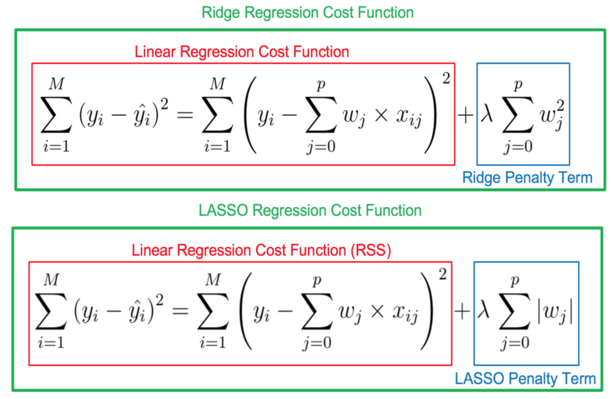

In [34]:
display(Image(filename='Ridge and Lasso Regression.png'))

In [35]:
# Split into train & test 

from sklearn.model_selection import train_test_split
target = "SalePrice"
X = data_modelling.drop(target, axis = 1).values
y = data_modelling[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print(X_train.shape)
print(X_test.shape)

(408, 79)
(175, 79)


In [36]:
# Train & predict

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso

reg_lasso = Lasso()
reg_lasso.fit(X_train, y_train)
y_predict = reg_lasso.predict(X_test)
RMSE = mean_squared_error(y_test, y_predict, squared = False)

print(RMSE)

0.18423662494974027


In [37]:
print(y_predict[:10])
print(y_test[:10])

[12.10064201 12.3338982  12.12170373 11.84064747 12.58066081 12.63069257
 11.96994921 12.49647105 12.38510629 12.02630108]
[11.92504174 12.36734505 12.09458786 11.04106411 12.72486942 12.49125535
 12.08391066 12.63134365 12.34583894 12.0435596 ]


In [38]:
result = {}
result["data_deletion"] = RMSE
result

{'data_deletion': 0.18423662494974027}

### Approach 2: Imputation (by value: Mean, Mode, Median)


In [39]:
data_modelling = data_impute_value.copy()

# Feature Engineering
data_modelling['Total_House_SF'] = data_modelling['TotalBsmtSF'] + data_modelling['1stFlrSF'] + data_modelling['2ndFlrSF']
data_modelling['Total_Home_Quality'] = (data_modelling['OverallQual'] + data_modelling['OverallCond'])/2
data_modelling['Total_Bathrooms'] = (data_modelling['FullBath'] + (0.5 * data_modelling['HalfBath']) + data_modelling['BsmtFullBath'] + (0.5 * data_modelling['BsmtHalfBath']))

# Select cols with skewness() > skew_limit = 1
skew_limit = 1.0
skew_vals = data_modelling[numeric_cols].skew()
skew_cols = skew_vals.sort_values(ascending = False).to_frame().rename(columns = {0:"Skew"})
skew_cols = skew_cols[abs(skew_cols["Skew"]) > skew_limit]

# De-skew the high skew columns -> Understand data distribution better
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
for col in skew_cols.index:
  if(col != "SalePrice"):
    data_modelling[col] = boxcox1p(data_modelling[col], boxcox_normmax(data_modelling[col] + 1))

# De-skew of the target cols with log(1+p)
data_modelling["SalePrice"] = np.log1p(data_modelling["SalePrice"])

# Feature Encoding
for col in data_categoric:
  Ord_encoder = OrdinalEncoder()
  val_cols = data_modelling[col].values.reshape(-1, 1)
  data_modelling[col] = Ord_encoder.fit_transform(val_cols)

# Data Division into Train/Test
from sklearn.model_selection import train_test_split
target = "SalePrice"
X = data_modelling.drop(target, axis = 1).values
y = data_modelling[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Learning data by the Lasso Algorithms
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
reg_lasso = Lasso()
reg_lasso.fit(X_train, y_train)
y_predict = reg_lasso.predict(X_test)

# Calculate Root Mean Squared Error
RMSE = mean_squared_error(y_test, y_predict, squared = False)
result["data_impute_value"] = RMSE
result

{'data_deletion': 0.18423662494974027, 'data_impute_value': 0.2336114986454667}

### Approach 3: Model-Based Imputation (Boosting)


In [40]:
data_modelling = data_model_imputation.copy()

# Feature Engineering
data_modelling['Total_House_SF'] = data_modelling['TotalBsmtSF'] + data_modelling['1stFlrSF'] + data_modelling['2ndFlrSF']
data_modelling['Total_Home_Quality'] = (data_modelling['OverallQual'] + data_modelling['OverallCond'])/2
data_modelling['Total_Bathrooms'] = (data_modelling['FullBath'] + (0.5 * data_modelling['HalfBath']) + data_modelling['BsmtFullBath'] + (0.5 * data_modelling['BsmtHalfBath']))

# Select cols with skewness() > skew_limit = 1
skew_limit = 1.0
skew_vals = data_modelling[numeric_cols].skew()
skew_cols = skew_vals.sort_values(ascending = False).to_frame().rename(columns = {0:"Skew"})
skew_cols = skew_cols[abs(skew_cols["Skew"]) > skew_limit]

# De-skew the high skew columns -> Understand data distribution better
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
for col in skew_cols.index:
  if(col != "SalePrice"):
    try:
      data_modelling[col] = boxcox1p(data_modelling[col], boxcox_normmax(data_modelling[col] + 1))
    except:
      print(f"{col} can not apply BoxCox")
      continue

# De-skew of the target cols with log(1+p)
data_modelling["SalePrice"] = np.log1p(data_modelling["SalePrice"])

# Feature Encoding
for col in data_categoric:
  Ord_encoder = OrdinalEncoder()
  val_cols = data_modelling[col].values.reshape(-1, 1)
  data_modelling[col] = Ord_encoder.fit_transform(val_cols)

# Data Division into Train/Test
from sklearn.model_selection import train_test_split
target = "SalePrice"
X = data_modelling.drop(target, axis = 1).values
y = data_modelling[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Learning data by the Lasso Algorithms
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
reg_lasso = Lasso()
reg_lasso.fit(X_train, y_train)
y_predict = reg_lasso.predict(X_test)

# Calculate Root Mean Squared Error
RMSE = mean_squared_error(y_test, y_predict, squared = False)
result["data_model_imputation"] = RMSE
result

{'data_deletion': 0.18423662494974027,
 'data_impute_value': 0.2336114986454667,
 'data_model_imputation': 0.23361150285891089}

### Approach 4: MICE

In [42]:
data_modelling = data_mice_imputation.copy()

# Feature Engineering
data_modelling['Total_House_SF'] = data_modelling['TotalBsmtSF'] + data_modelling['1stFlrSF'] + data_modelling['2ndFlrSF']
data_modelling['Total_Home_Quality'] = (data_modelling['OverallQual'] + data_modelling['OverallCond'])/2
data_modelling['Total_Bathrooms'] = (data_modelling['FullBath'] + (0.5 * data_modelling['HalfBath']) + data_modelling['BsmtFullBath'] + (0.5 * data_modelling['BsmtHalfBath']))

# Select cols with skewness() > skew_limit = 1
skew_limit = 1.0
skew_vals = data_modelling[numeric_cols].skew()
skew_cols = skew_vals.sort_values(ascending = False).to_frame().rename(columns = {0:"Skew"})
skew_cols = skew_cols[abs(skew_cols["Skew"]) > skew_limit]

# De-skew the high skew columns ==> Understand data distribution better
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
for col in skew_cols.index:
  if(col != "SalePrice"):
    try:
      data_modelling[col] = boxcox1p(data_modelling[col], boxcox_normmax(data_modelling[col] + 1))
    except:
      print(f"{col} can not apply BoxCox")
      continue

# De-skew of the target cols with log(1+p)
data_modelling["SalePrice"] = np.log1p(data_modelling["SalePrice"])

# Feature Encoding
for col in data_categoric:
  Ord_encoder = OrdinalEncoder()
  val_cols = data_modelling[col].values.reshape(-1, 1)
  data_modelling[col] = Ord_encoder.fit_transform(val_cols)

# Data Division into Train/Test
from sklearn.model_selection import train_test_split
target = "SalePrice"
X = data_modelling.drop(target, axis = 1).values
y = data_modelling[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Learning data by the Lasso Algorithms
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
reg_lasso = Lasso()
reg_lasso.fit(X_train, y_train)
y_predict = reg_lasso.predict(X_test)

# Calculate Root Mean Squared Error
RMSE = mean_squared_error(y_test, y_predict, squared = False)
result["data_mice_imputation"] = RMSE
result

{'data_deletion': 0.18423662494974027,
 'data_impute_value': 0.2336114986454667,
 'data_mice_imputation': 0.23361150279819295,
 'data_model_imputation': 0.23361150285891089}

# Result
- Deletion (Approach 1) gave the best result with lowest RMSE. However this approach removed all missing values, so the results were unreliable.
- Regarding 3 remaining approaches, the results were acceptable and stable with RMSE ~ 0.233